In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)



In [2]:
df= pd.read_csv('train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Getting rid of the columns which have more than 30% missing values

In [3]:
features= [feat for feat in df.columns if df[feat].isnull().mean() < 0.3]
df= df[features]

In [4]:
df.shape

(1460, 76)

# Getting columns with missing values

In [5]:
nan_feat= [feat for feat in df.columns if df[feat].isnull().sum()>1]
nan_feat

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [6]:
for feat in nan_feat:
    print(f'{feat} has {df[feat].isnull().mean()}')


LotFrontage has 0.1773972602739726
MasVnrType has 0.005479452054794521
MasVnrArea has 0.005479452054794521
BsmtQual has 0.025342465753424658
BsmtCond has 0.025342465753424658
BsmtExposure has 0.026027397260273973
BsmtFinType1 has 0.025342465753424658
BsmtFinType2 has 0.026027397260273973
GarageType has 0.05547945205479452
GarageYrBlt has 0.05547945205479452
GarageFinish has 0.05547945205479452
GarageQual has 0.05547945205479452
GarageCond has 0.05547945205479452


Text(0.5, 1.0, 'MISSING VALUE GRAPH')

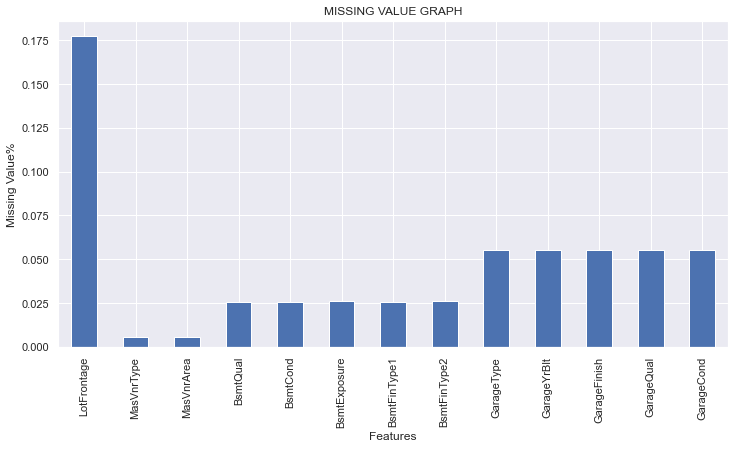

In [7]:
df[nan_feat].isnull().mean().plot.bar(figsize= (12,6))
plt.xlabel('Features')
plt.ylabel('Missing Value%')
plt.title('MISSING VALUE GRAPH')

# Numeric Features

In [8]:
num_feat= [feat for feat in df.columns if df[feat].dtype !=
'O' and feat not in ['SalePrice']+['Id']]
num_feat

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [9]:
print(f'Total number of Numeric Featyure are: {len(num_feat)}')

Total number of Numeric Featyure are: 36


# Year Features

In [10]:
year_feat= [feat for feat in num_feat if 'Yr' in feat or 'Year' in feat]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# Discrete attribute can assume a finite or countable infinite numbers of value.


# DISCRETE NUMBERIC FEATURES

In [11]:
discreate_feat= [feat for feat in num_feat if len(df[feat].unique())<25 and feat not in year_feat]
discreate_feat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [12]:
print(f'There are {len(discreate_feat)} discrete features')

There are 17 discrete features


# Let's visualize one of the discrete feature relationship with sale price

<AxesSubplot:xlabel='OverallQual'>

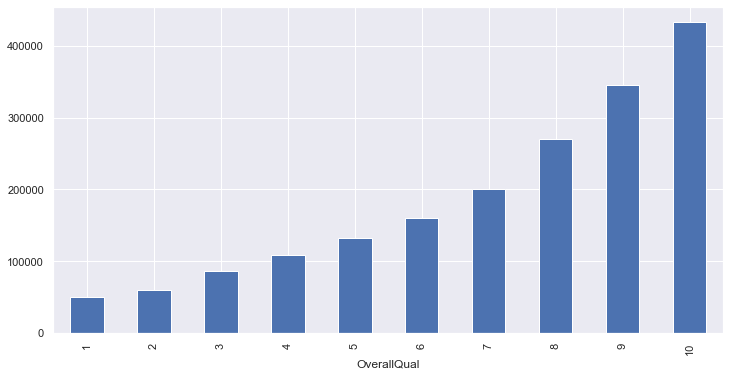

In [13]:
df.groupby('OverallQual')['SalePrice'].median().plot.bar(figsize= (12,6))

# Continuous attribute 

In [14]:
con_feat= [feat for feat in num_feat if len(df[feat].unique())>=25 and feat not in year_feat]
con_feat

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [15]:
print(f'There are {len(con_feat)} continuous features')

There are 15 continuous features


# Now let's visualize continuous feature relationship with sale

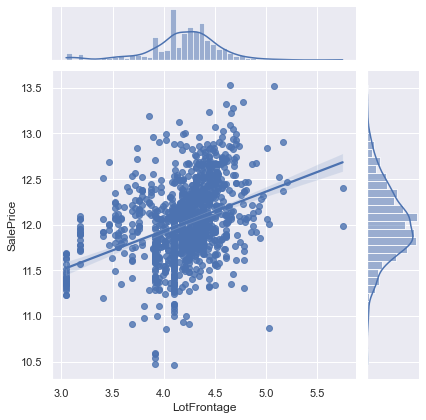

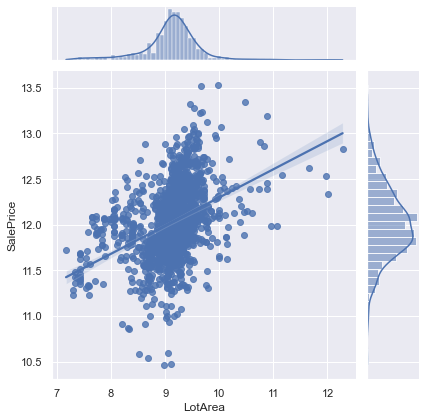

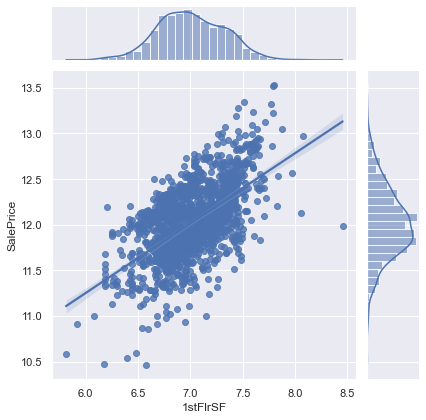

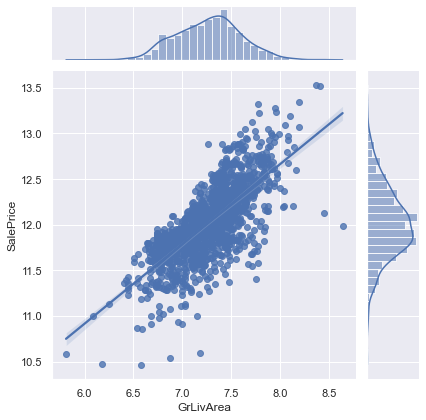

In [16]:
for feat in con_feat:
    data=df.copy()
    if 0 in data[feat].unique():
        pass
    else:
        data[feat]= np.log(data[feat])
        data['SalePrice']= np.log(data['SalePrice'])
        sns.jointplot(x=feat,y='SalePrice',data=data,kind='reg')


# Outliers

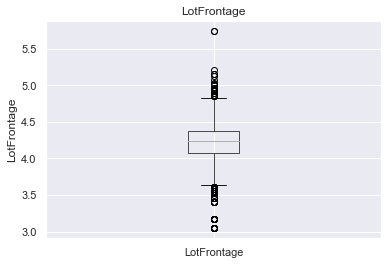

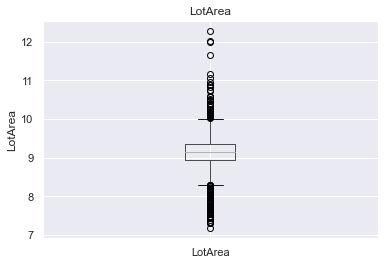

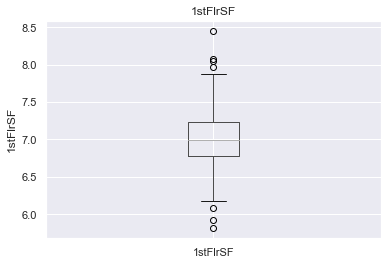

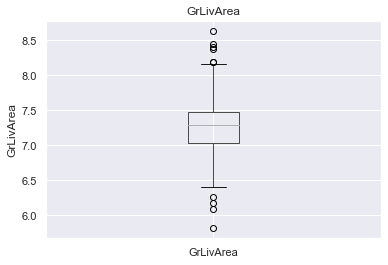

In [17]:
for feat in con_feat:
    data=df.copy()
    if 0 in data[feat].unique():
        pass
    else:
        data[feat]= np.log(data[feat])
        data.boxplot(column=feat)
        plt.ylabel(f'{feat}')
        plt.title(f'{feat}')
        plt.show()


# Categorical Variable

In [18]:
cat_feat=[feat for feat in df.columns if df[feat].dtype=='O']

In [19]:
print(f'There are {len(cat_feat)} categorical features')

There are 38 categorical features


In [20]:
df[cat_feat]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [21]:
for feat in cat_feat:
    print(f'{feat} number of unique values {len(df[feat].unique())}')

MSZoning number of unique values 5
Street number of unique values 2
LotShape number of unique values 4
LandContour number of unique values 4
Utilities number of unique values 2
LotConfig number of unique values 5
LandSlope number of unique values 3
Neighborhood number of unique values 25
Condition1 number of unique values 9
Condition2 number of unique values 8
BldgType number of unique values 5
HouseStyle number of unique values 8
RoofStyle number of unique values 6
RoofMatl number of unique values 8
Exterior1st number of unique values 15
Exterior2nd number of unique values 16
MasVnrType number of unique values 5
ExterQual number of unique values 4
ExterCond number of unique values 5
Foundation number of unique values 6
BsmtQual number of unique values 5
BsmtCond number of unique values 5
BsmtExposure number of unique values 5
BsmtFinType1 number of unique values 7
BsmtFinType2 number of unique values 7
Heating number of unique values 6
HeatingQC number of unique values 5
CentralAir nu

C:\Users\Afrin Peshimam\anaconda3\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


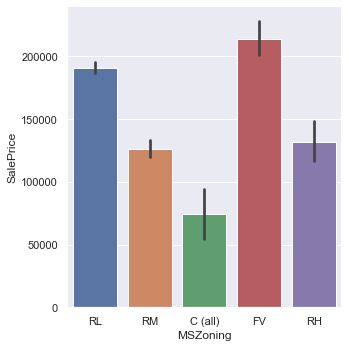

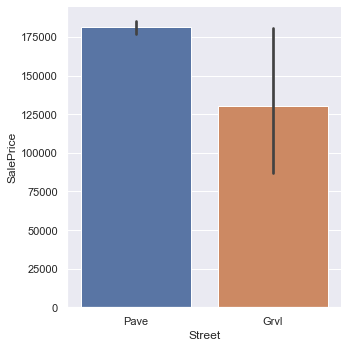

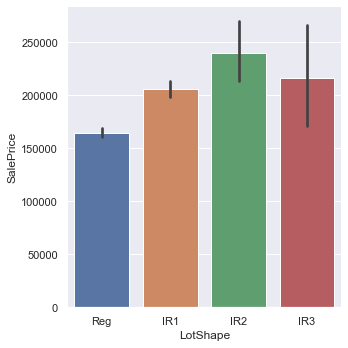

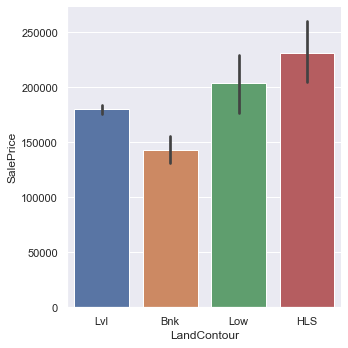

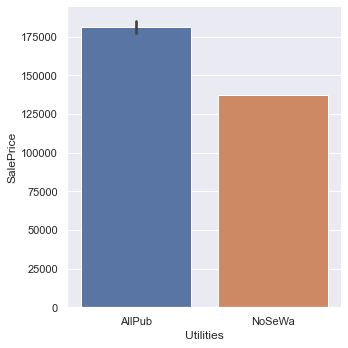

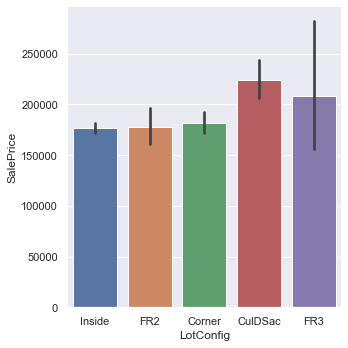

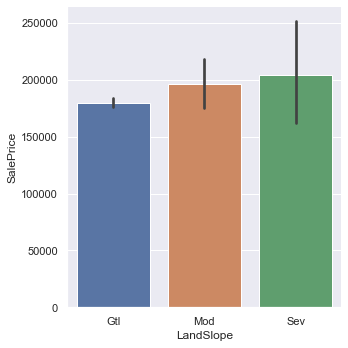

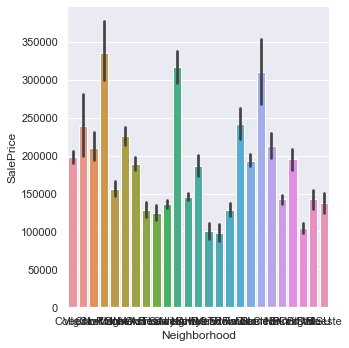

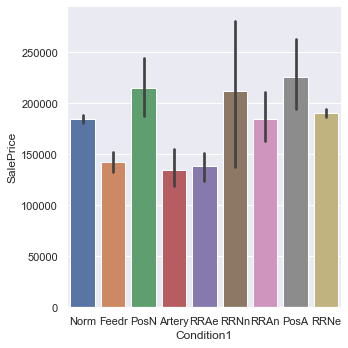

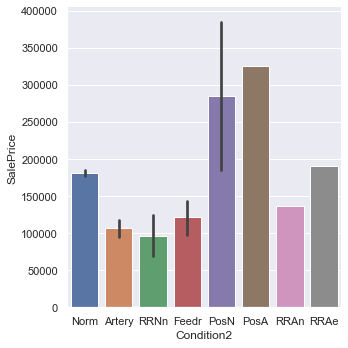

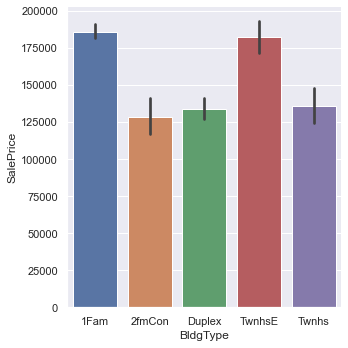

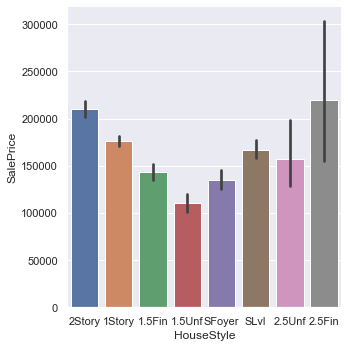

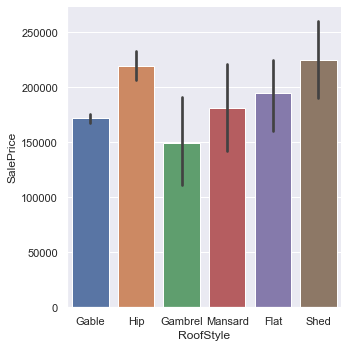

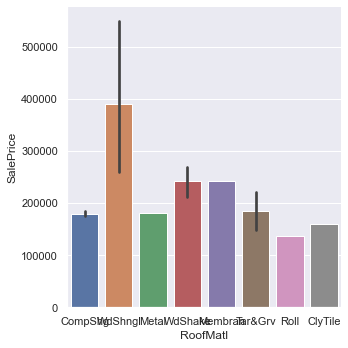

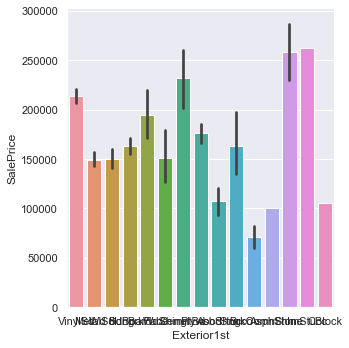

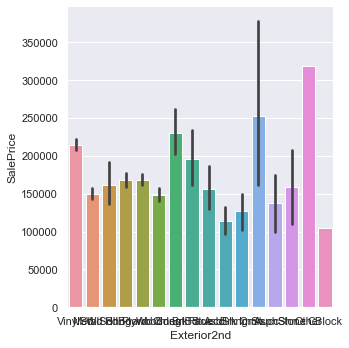

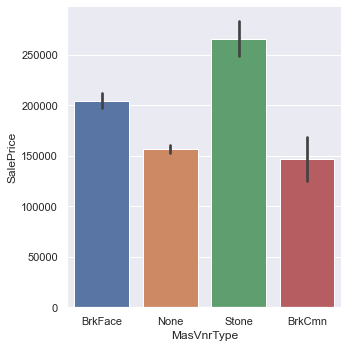

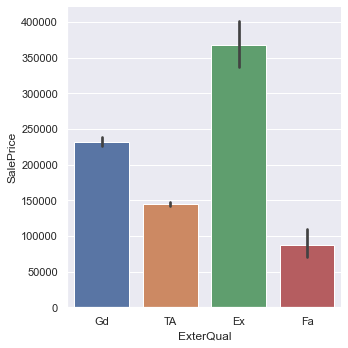

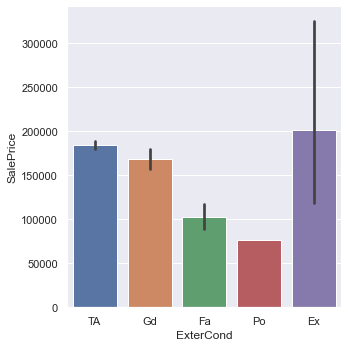

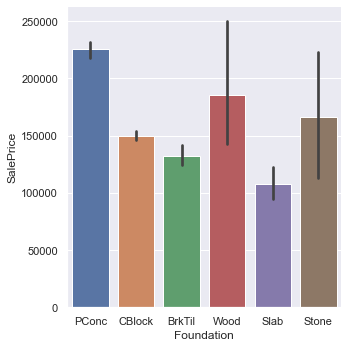

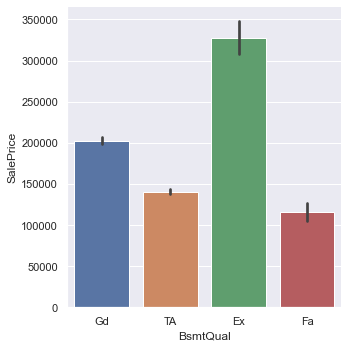

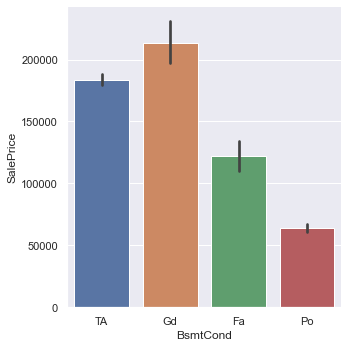

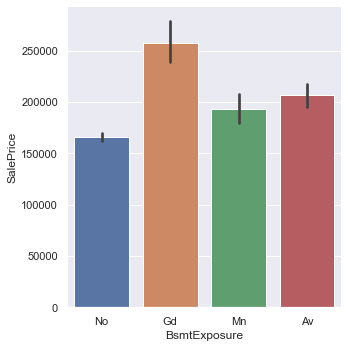

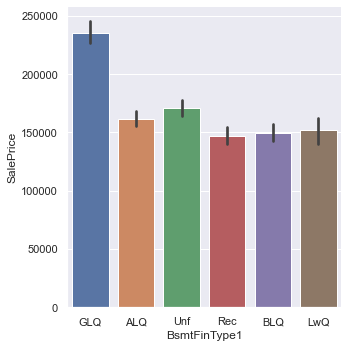

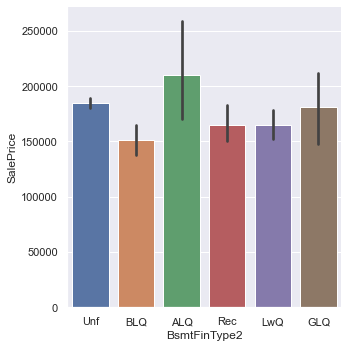

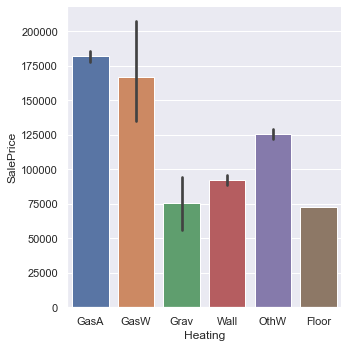

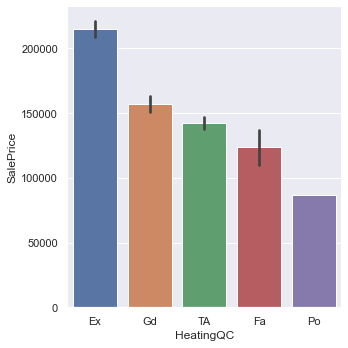

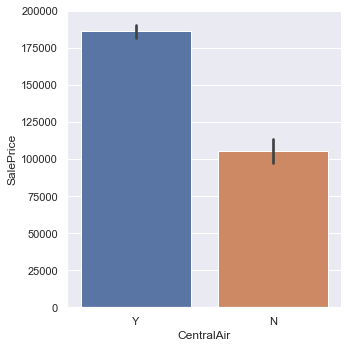

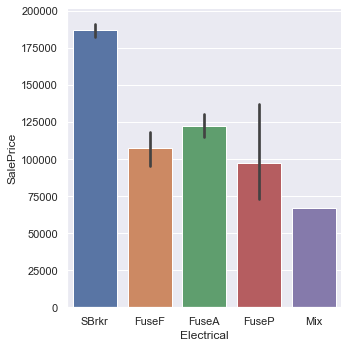

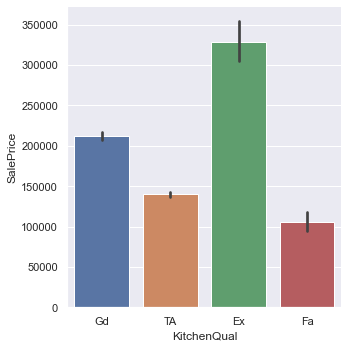

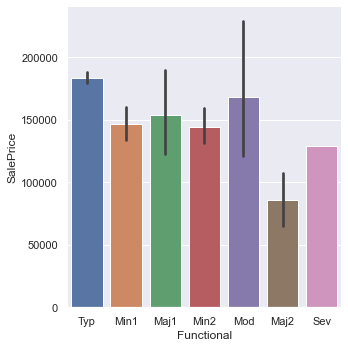

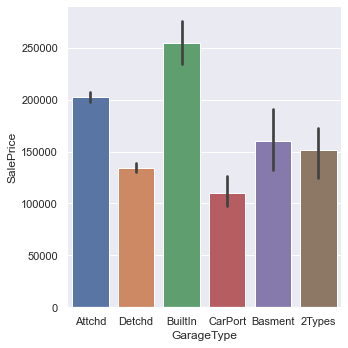

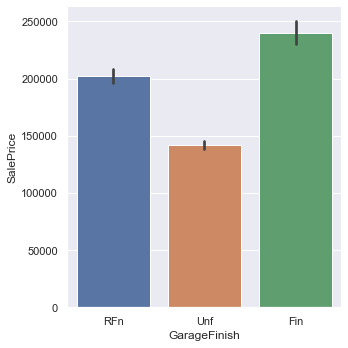

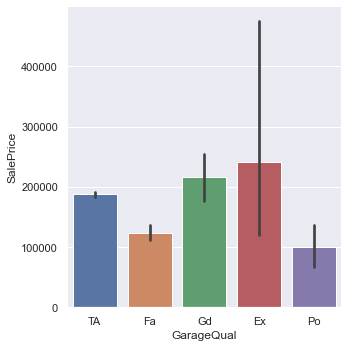

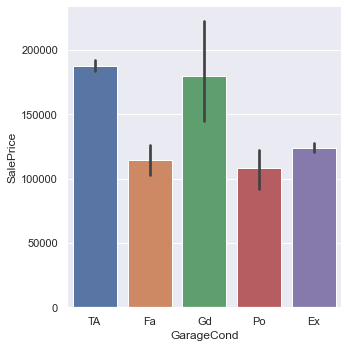

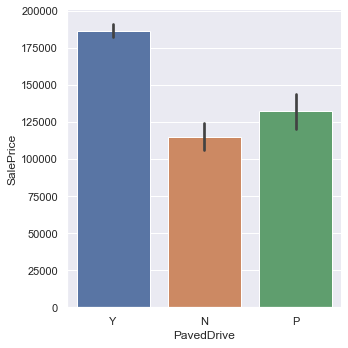

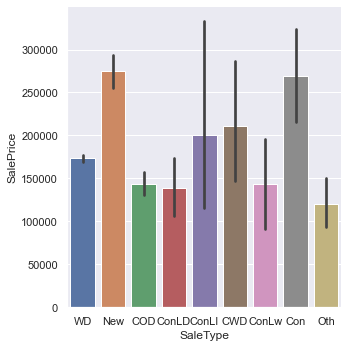

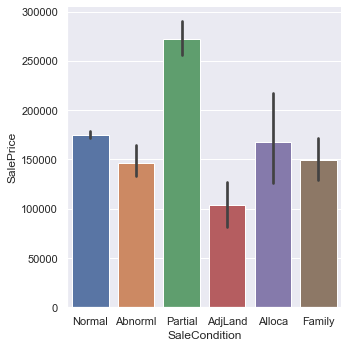

In [22]:
for feat in cat_feat:

    data= df.copy()
    sns.catplot(x= feat,y='SalePrice',data=data, kind='bar')

In [23]:
cat_nan=[feat for feat in cat_feat if df[feat].isnull().sum()>1]
cat_nan

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [24]:
def replace_cat_nan(df, cat_nan):
    data= df.copy()
    data[cat_nan]=df[cat_nan].fillna('Missing')
    return data


df= replace_cat_nan(df,cat_nan)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
cat_nan=[feat for feat in cat_feat if df[feat].isnull().sum()>1]
cat_nan

[]

In [26]:
num_nan=[feat for feat in num_feat if df[feat].isnull().sum()>1]
num_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [27]:
null_df=df[df.isna().any(axis=1)]
null_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,0,0,40,0,0,5,2009,WD,Normal,121000
1446,1447,20,RL,NaN,26142,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,0,4,2010,WD,Normal,157900
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,Missing,NaN,Missing,0,0,Missing,Missing,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,Missing,NaN,Missing,0,0,Missing,Missing,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


In [28]:
for feat in num_nan:
    if feat in con_feat:
        med= df[feat].median()

        df[feat].fillna(med, inplace=True)
    else:
        df.dropna(axis=0)
 


In [29]:
df.iloc[null_df[num_nan].index]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,69.0,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,69.0,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,69.0,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,69.0,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,RL,69.0,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,0,0,40,0,0,5,2009,WD,Normal,121000
1446,1447,20,RL,69.0,26142,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,0,4,2010,WD,Normal,157900
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,Missing,NaN,Missing,0,0,Missing,Missing,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,Missing,NaN,Missing,0,0,Missing,Missing,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


In [30]:
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [31]:
for feat in year_feat:
    if feat != 'YrSold':
        df[feat]= df['YrSold']- df[feat]

In [32]:
df[year_feat]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


# Rare Values

In [33]:
for feat in cat_feat:
    temp= df.groupby(feat)['SalePrice'].count()/len(df)
    temp_df= temp[temp>0.01].index
    df[feat]= np.where(df[feat].isin(temp_df), df[feat],'RareValue')

In [34]:
df[cat_feat]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,RareValue,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,RareValue,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [35]:
num_feat = ['LotFrontage',
 'LotArea','1stFlrSF','GrLivArea', 'SalePrice']

for feat in num_feat:
    df[feat]= np.log(df[feat])


In [36]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,RareValue,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,8.976768,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,6.859615,694,0,7.406711,0,0,2,1,3,1,TA,7,Typ,1,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,4.442651,9.486076,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,7.636752,0,0,7.636752,1,0,2,0,3,1,TA,7,Min1,2,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,4.189655,9.109636,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,RareValue,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,7.080026,1152,0,7.757906,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,4.219508,9.181632,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,6.982863,0,0,6.982863,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,60.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,1

In [37]:
df.nunique().to_frame(name='count').reset_index()

,index,count
0,Id,1460
1,MSSubClass,15
2,MSZoning,5
3,LotFrontage,110
4,LotArea,1073
...,...,...
71,MoSold,12
72,YrSold,5
73,SaleType,4
74,SaleCondition,5


In [38]:
for feat in cat_feat:
    mapping= {value: index for index, value in enumerate(df[feat].unique(),1)}
    df[feat] = df[feat].map(mapping)

In [39]:
df[cat_feat]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,2,1,3,2,2,1,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,3,2,1,2,1,1,1,2,5,1,3,1,1,2,2,1,2,1,1,1,1,1
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,2,3,2,4,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,2,1,2,2,1,3,1,5,1,2,1,3,1,1,1,2,1,1,1,1,1


In [40]:
df[df.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,1,4.174387,8.706159,1,1,1,1,1,1,16,1,1,3,2,4,5,53,53,1,1,9,5,2,0.0,2,1,1,4,3,5,6,0,3,0,0,0,1,3,2,4,7.049255,0,0,7.049255,0,0,2,0,2,2,4,6,1,0,5,NaN,4,0,0,4,3,2,0,0,0,0,0,0,0,6,2008,1,4,11.314475
48,49,190,2,3.496508,8.402007,1,1,1,1,1,1,8,1,1,2,1,4,5,89,1,1,1,2,2,2,0.0,2,1,3,2,1,1,3,0,1,0,736,736,1,2,1,1,6.601230,716,0,7.280697,0,0,2,0,2,3,2,8,1,0,5,NaN,4,0,0,4,3,2,0,0,102,0,0,0,0,6,2009,2,3,11.635143
78,79,90,1,4.276666,9.285262,1,1,1,1,1,1,10,1,1,3,2,4,5,42,42,2,1,4,4,2,0.0,2,1,2,2,1,1,3,0,1,0,1768,1768,1,3,2,1,7.477604,0,0,7.477604,0,0,2,0,4,2,2,8,1,0,5,NaN,4,0,0,4,3,1,0,0,0,0,0,0,0,4,2010,1,1,11.824080
88,89,50,3,4.653960,9.044286,1,2,1,1,3,1,14,2,2,1,3,3,2,94,27,2,1,8,5,2,0.0,4,3,2,2,4,1,3,0,1,0,1013,1013,1,3,2,1,6.920672,0,513,7.330405,0,0,1,0,2,1,4,6,1,0,5,NaN,4,0,0,4,3,2,0,0,156,0,0,0,0,10,2009,4,2,11.350407
89,90,20,1,4.094345,8.995909,1,1,1,1,1,1,1,1,1,1,2,4,5,13,12,1,1,1,1,2,0.0,2,1,1,1,1,1,1,588,1,0,402,990,1,1,1,1,6.897705,0,0,6.897705,1,0,1,0,3,1,2,5,1,0,5,NaN,4,0,0,4,3,1,0,0,0,0,0,0,0,8,2007,1,1,11.724806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,2,3.912023,8.565983,1,1,1,1,1,1,8,1,1,1,1,8,5,136,21,1,1,2,2,2,0.0,2,2,3,2,4,1,7,259,1,0,425,684,3,4,2,1,6.843750,1215,205,7.765569,0,0,2,0,4,1,2,8,1,0,5,NaN,4,0,0,4,3,1,0,54,20,0,0,0,0,12,2008,1,1,11.711776
1407,1408,20,1,4.234107,9.080232,1,2,1,1,3,1,5,1,1,1,2,5,5,24,24,1,1,4,5,2,0.0,2,1,2,2,1,1,2,625,1,0,208,833,1,1,1,1,6.725034,0,0,6.725034,1,0,1,0,3,1,2,5,1,0,5,NaN,4,0,0,4,3,1,0,0,0,0,0,0,0,3,2009,1,1,11.626254
1449,1450,180,2,3.044522,7.334982,1,1,1,1,1,1,15,1,1,5,5,5,7,36,36,1,1,7,7,2,0.0,2,1,2,1,1,4,1,553,1,0,77,630,1,1,1,1,6.445720,0,0,6.445720,1,0,1,0,1,1,3,3,1,0,5,NaN,4,0,0,4,3,1,0,0,0,0,0,0,0,8,2006,1,2,11.429544
1450,1451,90,1,4.094345,9.104980,1,1,1,1,2,1,12,1,1,3,1,5,5,35,35,1,1,1,1,2,0.0,2,1,2,1,1,1,3,0,1,0,896,896,1,3,1,1,6.797940,896,0,7.491088,0,0,2,2,4,2,2,8,1,0,5,NaN,4,0,0,4,3,1,32,45,0,0,0,0,0,9,2009,1,1,11.820410


In [41]:
df.dropna(axis=0,inplace=True)

# Feature Selection

In [42]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Id', 'SalePrice'])
y= df['SalePrice']

In [44]:
feature_selected= SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_selected.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [45]:
selected_features= X.columns[(feature_selected.get_support())]
selected_features

Index(['MSSubClass', 'LotArea', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

In [46]:
X= X[selected_features]

In [47]:
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)


In [48]:
X_scaled= pd.DataFrame(X_scaled, columns= X.columns)

In [49]:
X_scaled

,MSSubClass,LotArea,LandContour,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,0.235294,0.366344,0.0,0.00,0.000000,0.0,0.625,0.428571,0.038760,0.098361,0.0,0.122500,0.00,0.00,0.000000,0.125089,0.000000,0.064212,0.140098,0.00,0.282556,0.413559,0.0,0.555556,0.00,0.000000,0.0,0.046729,0.333333,0.308426,0.000000,0.111517,0.000000,0.0,0.0,0.0
1,0.000000,0.391317,0.0,0.25,0.045455,0.2,0.500,0.857143,0.240310,0.524590,0.1,0.000000,0.25,0.25,0.166667,0.173281,0.000000,0.121575,0.206547,0.00,0.446250,0.000000,0.0,0.333333,0.00,0.333333,0.0,0.289720,0.333333,0.238474,0.347725,0.000000,0.000000,0.0,0.0,0.0
2,0.235294,0.422359,0.0,0.00,0.000000,0.0,0.625,0.428571,0.054264,0.114754,0.0,0.101250,0.00,0.50,0.000000,0.086109,0.000000,0.185788,0.150573,0.00,0.312961,0.419370,0.0,0.333333,0.00,0.333333,0.0,0.065421,0.333333,0.356121,0.000000,0.076782,0.000000,0.0,0.0,0.0
3,0.294118,0.390295,0.0,0.50,0.090909,0.0,0.625,0.428571,0.705426,0.606557,0.2,0.000000,0.50,0.00,0.166667,0.038271,0.000000,0.231164,0.123732,0.25,0.331347,0.366102,0.0,0.444444,0.00,0.333333,0.2,0.074766,0.666667,0.383148,0.000000,0.063985,0.492754,0.0,0.0,0.0
4,0.235294,0.468761,0.0,0.25,0.136364,0.0,0.750,0.428571,0.062016,0.147541,0.0,0.218750,0.00,0.75,0.000000,0.116052,0.000000,0.209760,0.187398,0.00,0.405222,0.509927,0.0,0.666667,0.00,0.333333,0.0,0.074766,0.666667,0.537361,0.224037,0.153565,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.235294,0.353592,0.0,0.00,0.772727,0.0,0.500,0.428571,0.062016,0.131148,0.0,0.000000,0.00,0.00,0.333333,0.000000,0.000000,0.407962,0.155974,0.00,0.327822,0.336077,0.0,0.444444,0.00,0.333333,0.0,0.074766,0.333333,0.238474,0.000000,0.073126,0.000000,0.0,0.0,0.0
1375,0.000000,0.453273,0.0,0.00,0.272727,0.0,0.500,0.571429,0.248062,0.377049,0.7,0.074375,0.25,0.00,0.166667,0.139972,0.110583,0.252140,0.252373,0.50,0.655535,0.000000,0.0,0.444444,0.25,0.666667,0.0,0.299065,0.333333,0.270270,0.407235,0.000000,0.000000,0.0,0.0,0.0
1376,0.294118,0.379597,0.0,0.00,0.090909,0.0,0.625,1.000000,0.534884,0.081967,0.6,0.000000,0.75,0.00,0.000000,0.048724,0.000000,0.375428,0.188543,0.00,0.420768,0.557869,0.0,0.666667,0.00,0.666667,0.0,0.644860,0.000000,0.073132,0.000000,0.109689,0.000000,0.0,0.0,0.0
1377,0.000000,0.393688,0.0,0.00,0.500000,0.0,0.375,0.571429,0.465116,0.245902,0.1,0.000000,0.25,0.50,0.000000,0.008682,0.698100,0.000000,0.176432,0.25,0.379795,0.000000,0.0,0.222222,0.00,0.000000,0.0,0.560748,0.000000,0.063593,0.427071,0.000000,0.202899,0.0,0.0,0.0
